In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform 

In [74]:
img = cv2.imread('img/sudoku1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

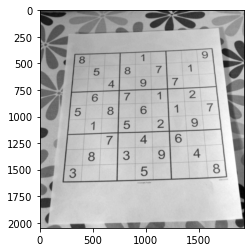

In [75]:
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 3)
plt.imshow(img_blurred, cmap='gray')
plt.show()

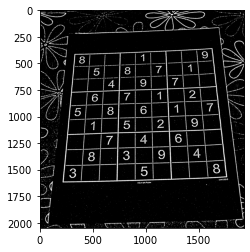

In [76]:
thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh, cmap='gray')

In [77]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [78]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [79]:
sudoku_contour = None

for contour in contours:
    epsilon = 0.1 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:
        sudoku_contour = approx
        break
    
if sudoku_contour is None:
    print('i couldnt find any match')

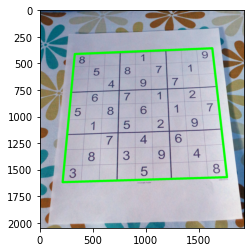

In [80]:
sudoku = cv2.drawContours(img, [sudoku_contour], -1, (0, 255, 0), 20)
plt.imshow(sudoku)
plt.show()

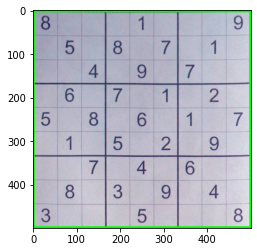

In [81]:
# I found 2 ways to transform an image.
# 1:
warped = four_point_transform(img, approx.reshape(4,2))
warped = cv2.resize(warped, (500, 500))
plt.imshow(warped)

In [82]:
# 2:
src_pts = np.array([sudoku_contour[1], sudoku_contour[0], sudoku_contour[3], sudoku_contour[2]], dtype=np.float32)
dst_pts = np.array([[0, 0],   [500, 0],  [500, 500], [0, 500]], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)
warp = cv2.warpPerspective(img, M, (500, 500))

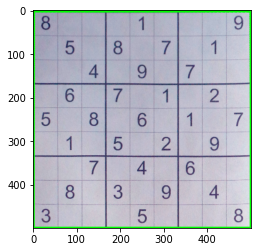

In [83]:
plt.imshow(warp)
plt.show()